# CA4

### Imports

In [1]:
import numpy as np
import pandas as pd 
import csv

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score, f1_score,
                             make_scorer, ConfusionMatrixDisplay)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import (GridSearchCV, 
                                     RandomizedSearchCV,
                                     cross_val_score, 
                                     StratifiedKFold)
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import (HalvingGridSearchCV,
                                    HalvingRandomSearchCV)

import matplotlib.pyplot as plt 
import seaborn as sns 

/tmp/ipykernel_1012332/321208685.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/home/idris/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Reading data

In [2]:
# Reading our training data
df = pd.read_csv('assets/train.csv', index_col=0)
df.set_index('index', inplace=True)
df.head()

,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Alcohol_Use (yes/no),Bilirubin (mg/dL),CRP (mg/L),Diabetes (yes/no),...,Serum_Creatinine (mg/dL),Serum_Iron (μg/dL),Serum_Lactate (mmol/L),Serum_Urea (mg/dL),Serum_Zinc (μg/dL),TIBC (μg/dL),Transferrin_Saturation (%),WBC (10^9/L),pH,Diagnosis
index,,,,,,,,,,,,,,,,,,,,,
1124,13.571425,1653.138489,40.405592,45.598427,4,4.477126,yes,0.541997,1.002121,no,...,2.569954,97.242495,2.923385,26.696110,96.124260,315.439318,30.827639,4.180007,6.163600,Healthy
1188,13.649342,1940.518305,21.336986,34.064095,55,3.190724,yes,1.199063,0.582746,no,...,3.024642,128.597676,2.719966,23.021218,50.554650,268.492437,47.896200,4.590995,5.244266,Cirrhosis
530,10.898943,1557.369920,29.665496,16.044488,30,4.506351,no,0.740952,1.670375,no,...,2.219844,98.026938,3.267757,20.123808,82.900681,312.107620,31.408057,4.524580,5.769592,Healthy
686,13.872275,1273.840525,142.418649,64.204257,0,3.665655,yes,1.939879,1.220646,no,...,1.704282,63.105133,1.937625,36.436855,72.360010,182.506010,34.577016,4.234483,5.982228,Drug-induced Liver Injury
296,10.102457,1461.622515,22.437303,23.940205,59,4.005109,no,0.769535,0.139863,no,...,2.656926,89.966713,1.979801,20.036074,63.216136,212.261519,42.384844,4.306892,4.837404,Healthy


In [3]:
# Reading our test data, which will be used in the final evaluation
X_test = pd.read_csv('assets/test.csv', index_col=0)
X_test.set_index('index', inplace=True)
X_test.head()

,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Alcohol_Use (yes/no),Bilirubin (mg/dL),CRP (mg/L),Diabetes (yes/no),...,Serum_Copper (μg/dL),Serum_Creatinine (mg/dL),Serum_Iron (μg/dL),Serum_Lactate (mmol/L),Serum_Urea (mg/dL),Serum_Zinc (μg/dL),TIBC (μg/dL),Transferrin_Saturation (%),WBC (10^9/L),pH
index,,,,,,,,,,,,,,,,,,,,,
584,10.889731,1073.225118,128.902456,106.675435,51,4.000971,yes,1.022449,2.414993,no,...,90.654388,2.682107,85.327495,2.130148,14.920351,106.671168,233.450604,36.550557,19.326563,6.494922
183,9.336239,1265.556647,17.411855,11.417480,15,5.022483,no,0.306729,2.872989,no,...,130.082257,1.797770,168.429980,3.336129,11.822935,124.350374,385.361059,43.707058,5.127804,6.426953
350,9.596510,1248.856838,98.029030,111.589430,18,4.102368,no,0.496663,0.452532,no,...,96.513750,2.569339,80.862540,4.043553,17.444002,87.782518,307.868972,26.265245,4.247543,7.054559
1401,7.874536,1151.339119,40.576883,-7.889038,33,4.228515,no,0.705237,2.376890,no,...,85.538603,2.146402,142.833106,3.103085,30.969093,67.967233,400.051137,35.703712,4.373614,5.834489
1270,8.612401,1784.363119,30.359700,15.241851,39,4.200873,yes,0.640090,6.384251,no,...,139.213829,2.234448,54.671627,2.189221,37.196571,80.164147,324.338615,16.856342,4.886107,6.104516


### Data exploration and visualisation

In [4]:
# Creates histogram or box plots.
def plot_dist_box(df, column_names, dist=True, box=False):
    plt.figure(figsize=(32,24))
    
    for i in range(0, len(column_names)):
        plt.subplot(6, 6, i+1)
        if dist:
            sns.histplot(df[column_names[i]], bins=20, kde=True)
        if box:
            sns.boxplot(df[column_names[i]])
        plt.title('Distrubution of {0}'.format(column_names[i]))
        
    # plt.tight_layout()
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.9)
    plt.show()

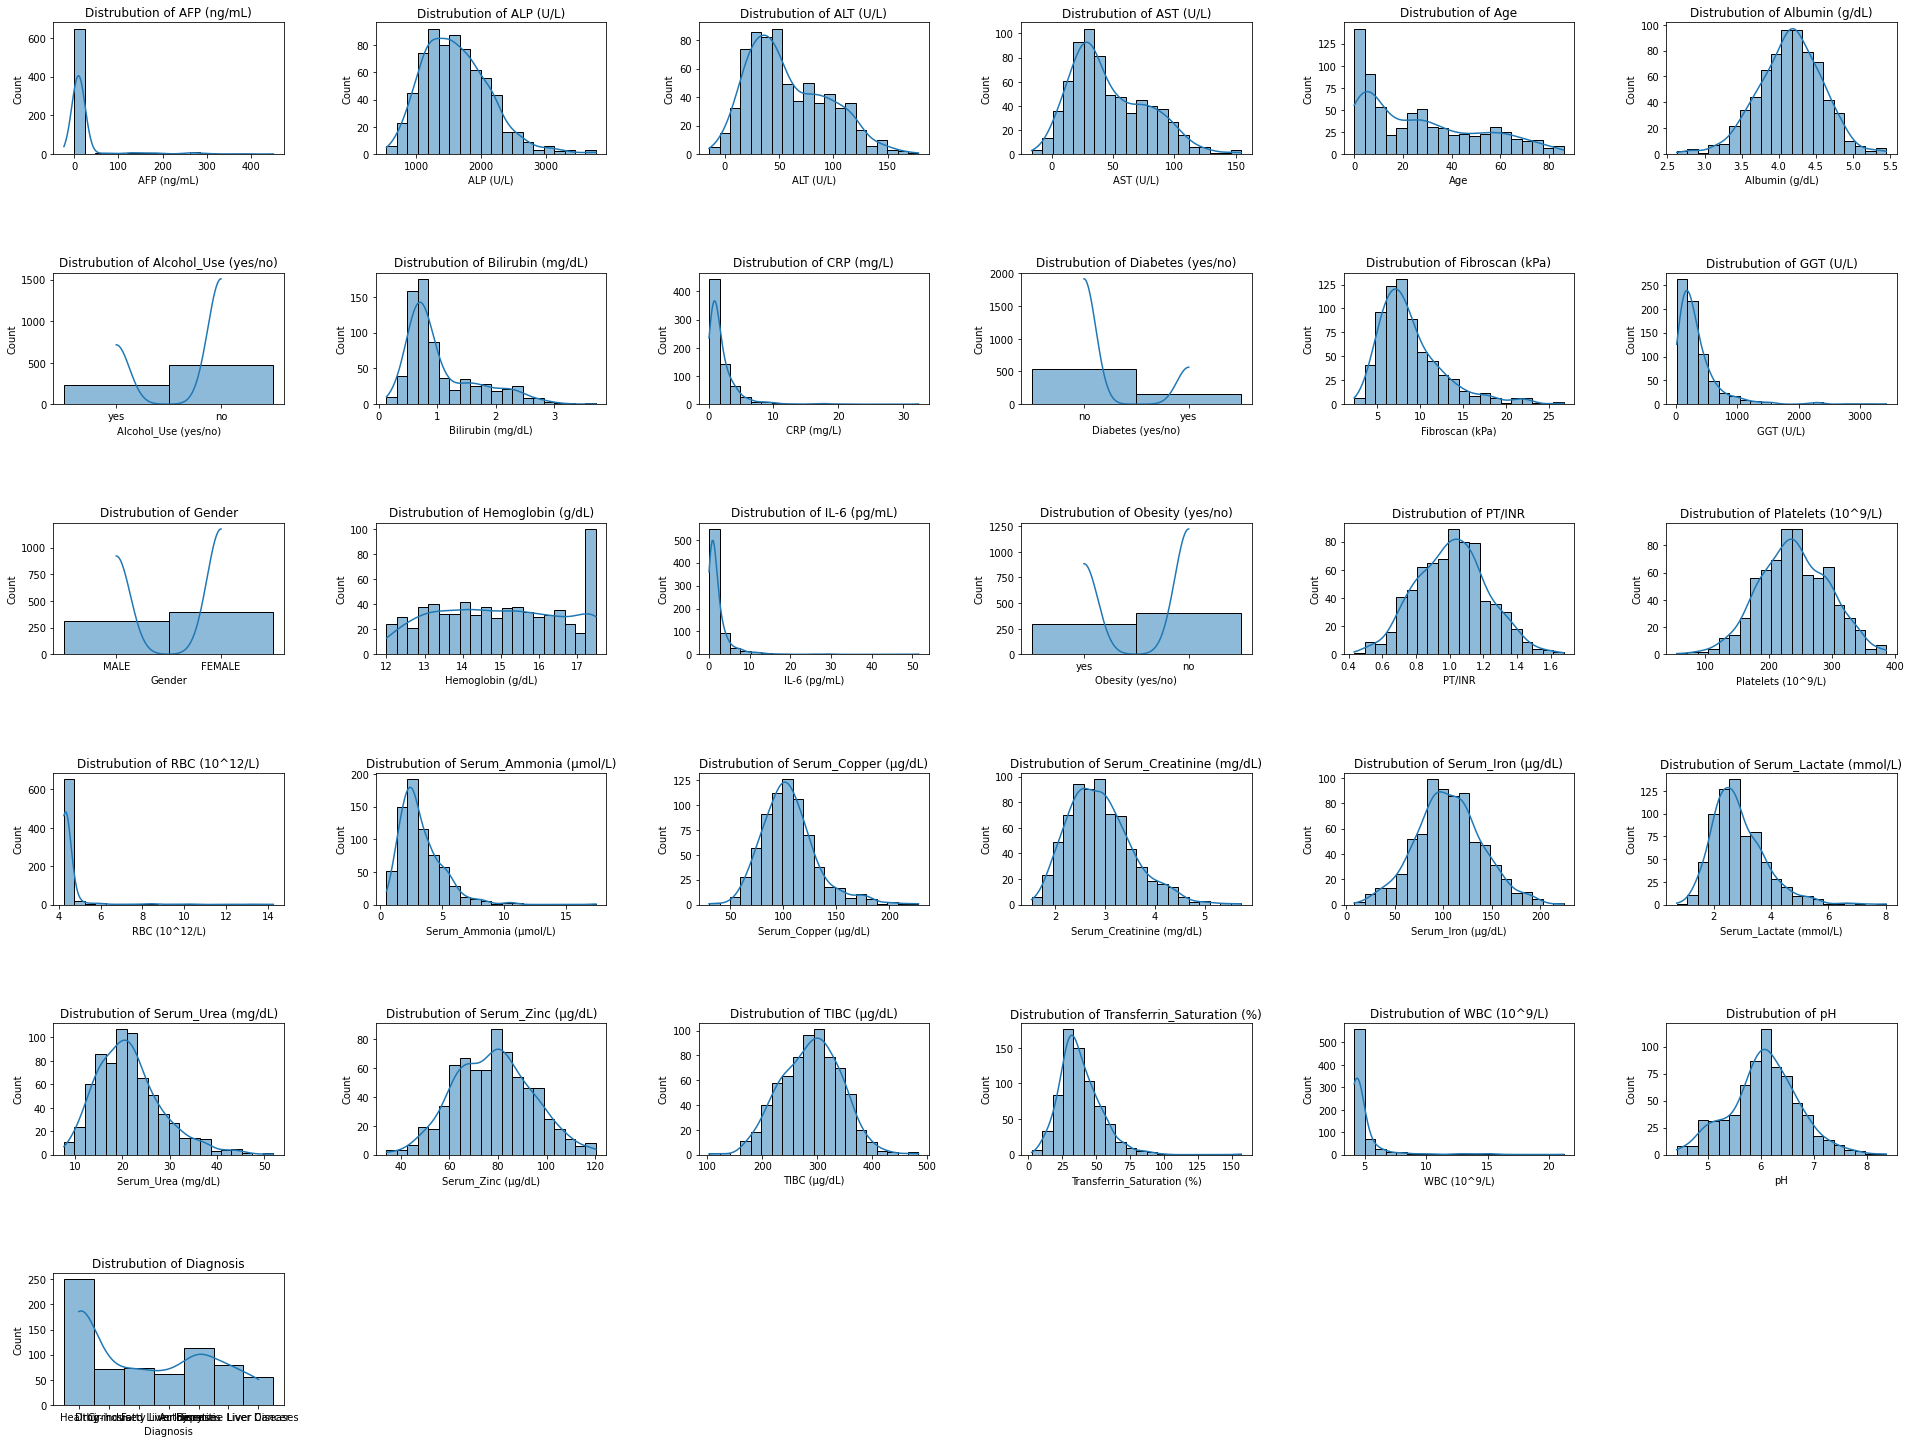

In [5]:
# I want to see the distribution for all of the columns in our dataset
column_names = df.columns
plot_dist_box(df, column_names)

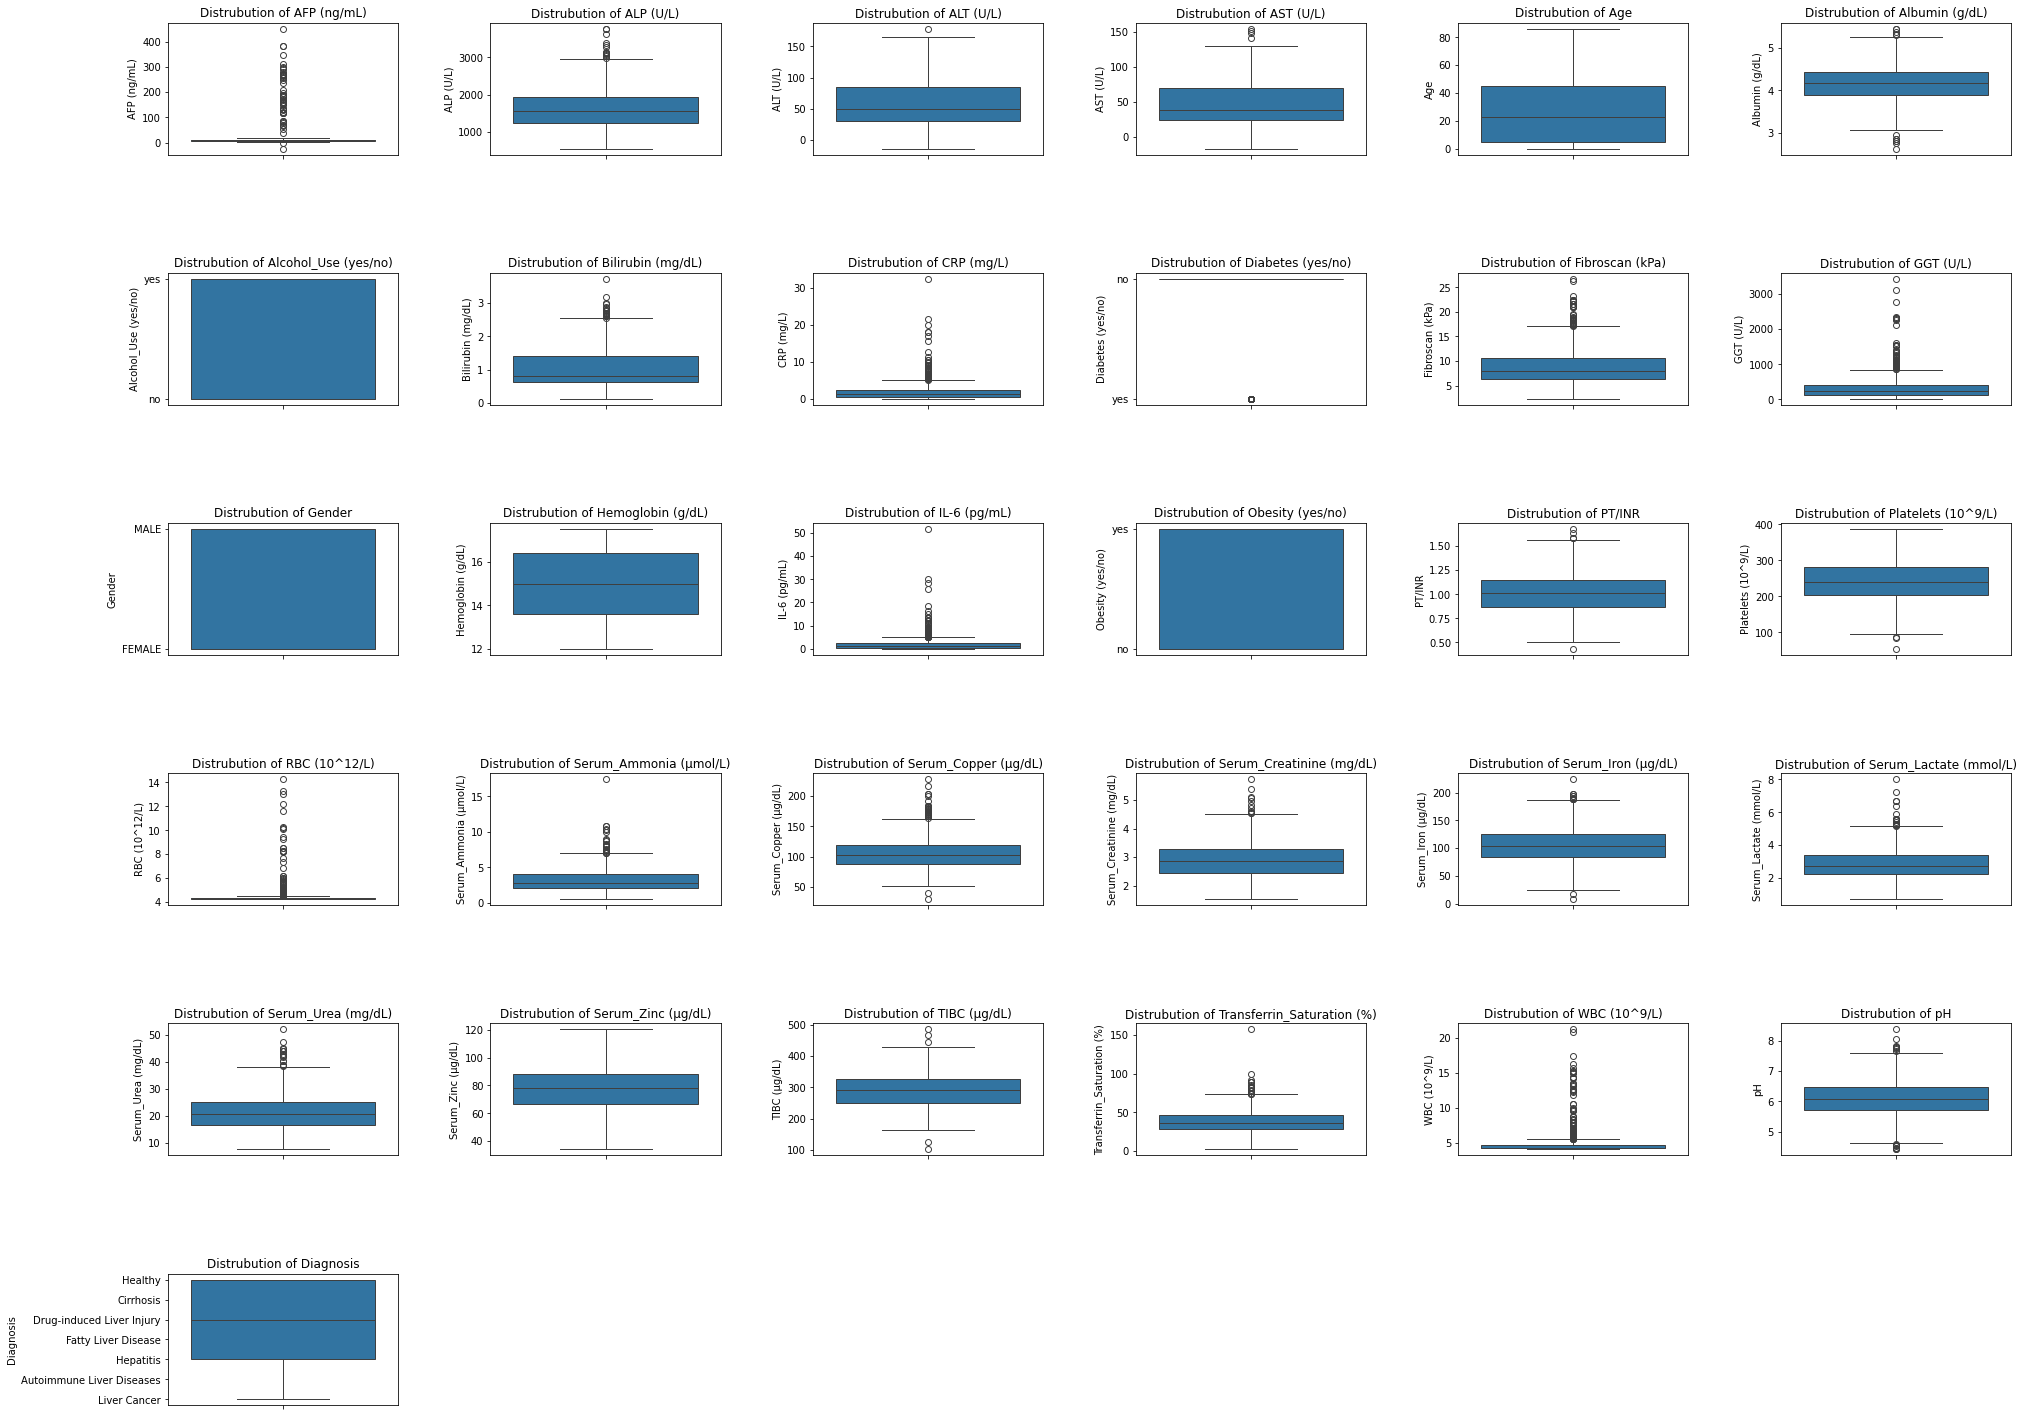

In [6]:
plot_dist_box(df, column_names, dist=False, box=True)

In [7]:
assert 703 == len(df) and 302 == len(X_test)
print ("The lenght of the datasets are as expected: {0} train, {1} test".format(len(df), len(X_test)))

The lenght of the datasets are as expected: 703 train, 302 test


In [8]:
# Checking to see if there are any nan values i our dataset
df.isnull().sum()

AFP (ng/mL)                   0
ALP (U/L)                     0
ALT (U/L)                     0
AST (U/L)                     0
Age                           0
Albumin (g/dL)                0
Alcohol_Use (yes/no)          0
Bilirubin (mg/dL)             0
CRP (mg/L)                    0
Diabetes (yes/no)             0
Fibroscan (kPa)               0
GGT (U/L)                     0
Gender                        0
Hemoglobin (g/dL)             0
IL-6 (pg/mL)                  0
Obesity (yes/no)              0
PT/INR                        0
Platelets (10^9/L)            0
RBC (10^12/L)                 0
Serum_Ammonia (μmol/L)        0
Serum_Copper (μg/dL)          0
Serum_Creatinine (mg/dL)      0
Serum_Iron (μg/dL)            0
Serum_Lactate (mmol/L)        0
Serum_Urea (mg/dL)            0
Serum_Zinc (μg/dL)            0
TIBC (μg/dL)                  0
Transferrin_Saturation (%)    0
WBC (10^9/L)                  0
pH                            0
Diagnosis                     0
dtype: i

It seems like there are no missing values in this dataset.

### Data cleaning and preprocessing 

In [9]:
# Creating the features and the target sets
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']
y.shape

(703,)

### Dealing with categorical data
Since there exist categorical data in our dataset, we must either onehot encode them before training or use piplines which wil do it automatically for us. 

In [10]:
# Extracting the categorical column names.
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Alcohol_Use (yes/no)', 'Diabetes (yes/no)', 'Gender', 'Obesity (yes/no)']

In [11]:
all_columns = X.columns

# Extracting the numerical column names.
numerical_columns = [col for col in all_columns if not col in categorical_columns]
numerical_columns

['AFP (ng/mL)',
 'ALP (U/L)',
 'ALT (U/L)',
 'AST (U/L)',
 'Age',
 'Albumin (g/dL)',
 'Bilirubin (mg/dL)',
 'CRP (mg/L)',
 'Fibroscan (kPa)',
 'GGT (U/L)',
 'Hemoglobin (g/dL)',
 'IL-6 (pg/mL)',
 'PT/INR',
 'Platelets (10^9/L)',
 'RBC (10^12/L)',
 'Serum_Ammonia (μmol/L)',
 'Serum_Copper (μg/dL)',
 'Serum_Creatinine (mg/dL)',
 'Serum_Iron (μg/dL)',
 'Serum_Lactate (mmol/L)',
 'Serum_Urea (mg/dL)',
 'Serum_Zinc (μg/dL)',
 'TIBC (μg/dL)',
 'Transferrin_Saturation (%)',
 'WBC (10^9/L)',
 'pH']

### Dealing with outliers

In [12]:
def remove_outliers(data, column_names):
    outlier_indices = []
    for i in column_names:
        z_score = (data[i] - np.mean(data[i])) / np.std(data[i])
        outliers = np.abs(z_score) > 3
        outlier_indices.extend(data.index[outliers])
        print("There are {0} number of outliers in feature {1}.".format(np.sum(outliers), i))
    unique_outliers = list(set(outlier_indices))
    print("Total number of outliers: ", len(unique_outliers))
    return unique_outliers

outlier_indices = remove_outliers(X, numerical_columns)

There are 23 number of outliers in feature AFP (ng/mL).
There are 6 number of outliers in feature ALP (U/L).
There are 1 number of outliers in feature ALT (U/L).
There are 4 number of outliers in feature AST (U/L).
There are 0 number of outliers in feature Age.
There are 6 number of outliers in feature Albumin (g/dL).
There are 4 number of outliers in feature Bilirubin (mg/dL).
There are 11 number of outliers in feature CRP (mg/L).
There are 16 number of outliers in feature Fibroscan (kPa).
There are 14 number of outliers in feature GGT (U/L).
There are 0 number of outliers in feature Hemoglobin (g/dL).
There are 10 number of outliers in feature IL-6 (pg/mL).
There are 1 number of outliers in feature PT/INR.
There are 1 number of outliers in feature Platelets (10^9/L).
There are 17 number of outliers in feature RBC (10^12/L).
There are 9 number of outliers in feature Serum_Ammonia (μmol/L).
There are 6 number of outliers in feature Serum_Copper (μg/dL).
There are 5 number of outliers i

In [13]:
X = X.drop(outlier_indices)
y = y.drop(outlier_indices)

In [14]:
assert X.shape[0] == (703-155) and y.shape[0] == (703-155)
print("Outliers have been removed.")

Outliers have been removed.


### OneHotEncoding without using pipelines

In [15]:
# Initializing the OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False) # The default is true and we do not want a sparse matrix

# Applying one-hot encoding to the categorical columns of the train and test data. 
# one_hot_encoded_train = encoder.fit_transform(X[categorical_columns])
# one_hot_encoded_test = encoder.fit_transform(X_test[categorical_columns])

# Now we create a DataFrame with the one-hot encoded columns.
# Note: get_feature_names_out is used to get column name for the encoded data.
# one_hot_df_train = pd.DataFrame(one_hot_encoded_train,
#                           columns=encoder.get_feature_names_out(categorical_columns))
# one_hot_df_test = pd.DataFrame(one_hot_encoded_test,
#                          columns=encoder.get_feature_names_out(categorical_columns))

# Checking to see if the encoding has been correctly applied for our train set.
# one_hot_df_train.set_index(X.index, inplace=True)
# one_hot_df_train.head()

In [16]:
# Checking to see if the encoding has been correctly applied for our test set.
# one_hot_df_test.set_index(X_test.index, inplace=True)
# one_hot_df_test.head()

In [17]:
# We drop the original categorical data from our dataset
# X = X.drop(categorical_columns, axis=1)
# X_test = X_test.drop(categorical_columns, axis=1)

# print("The shape of train: {} and the shape of test: {}".format(X.shape, X_test.shape))

In [18]:
# Now we concatenate the one-hot encoded DataFrame with our features DataFrame X
# The same must be done for our test set as well.
# X = pd.concat([X, one_hot_df_train], axis=1)
# X_test = pd.concat([X_test, one_hot_df_test], axis=1)
# X.shape

### OneHotEncoding and scaling using pipelines

In [19]:
# Defining a transformer for the numerical columns that are to be scaled.
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Defining a transformer for the categorical columns that are to be onehot encoded.
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])


# We then define a preprocessor so that we may pass it
# into our models pipelines later.
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_columns),
        ('categorical', categorical_transformer, categorical_columns)
    ]
)

### Data Modelling using SVC & LogisticRegression

For this part of the task I am going to create two pipelines. One of which will use a kernel, and the other will use regularization. I am going to star by creating a pipeline for an SVC classifier.

### Support vector machine (SVC) application
For this part of the task I am going to create two pipelines. One of which will use a kernel, and the other will use regularization. I am going to star by creating a pipeline for an SVC classifier.

In [20]:
# Splitting our dataset into train and validation parts.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

In [21]:
# Defining a pipeline with an SVC classifier, which will 
# uses a standard scaler and pca for dimensionality.
pipeline_svc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA()),
    ('svc', SVC(max_iter=100000000))
])
pipeline_svc.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    ['AFP (ng/mL)', 'ALP (U/L)', 'ALT (U/L)',
                                     'AST (U/L)', 'Age', 'Albumin (g/dL)',
                                     'Bilirubin (mg/dL)', 'CRP (mg/L)',
                                     'Fibroscan (kPa)', 'GGT (U/L)',
                                     'Hemoglobin (g/dL)', 'IL-6 (pg/mL)', 'PT/INR',
                                     'Platelets (10^9/L)', 'RBC (10^12/L)',
                                     'Serum_Ammonia (μmol/L)',
                                     'Serum_Copper (μg/dL)',
                                     'Serum_Creatinine (mg/dL)',
                                     'Serum_Iron (μg/dL)',
                                     'Serum_Lactate (mmol/L)',
                                     'Serum_Urea (mg/dL)'

In [22]:
# Defining a list of C and gamma parameters 
# to test with, in order to find the best paramaters.
C_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
gamma_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# PCA explained variance values.  
pca_range = [0.6, 0.84, 0.90]

# Defining our parameter grid.
param_grid_svc = [
    {
        'pca__n_components': pca_range,
        'svc__C': C_range,
        'svc__kernel': ['linear']
    },
    {
        'pca__n_components': pca_range,
        'svc__C': C_range,
        'svc__kernel': ['rbf'],
        'svc__gamma': gamma_range
    }
]

f1_scorer = make_scorer(f1_score, average='macro', pos_label=None)

# Here we perform a grid search cross validation, where we pass in our 
# pipeline and parameter grid in order to perform cross validation for the 
# different parameters. We use all our processors as n_jobs = -1.
grid_search_svc = GridSearchCV(estimator=pipeline_svc,
                              param_grid=param_grid_svc,
                              scoring=f1_scorer, # scoring='accuracy',
                              cv=7,
                              n_jobs=-1)

In [23]:
# We perform the grid search on the training data.
gs_svc_result = grid_search_svc.fit(X_train, y_train)
print(gs_svc_result.best_score_)
print(gs_svc_result.best_params_)

0.6785544366442202
{'pca__n_components': 0.9, 'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [24]:
# We extract the best estimator from our model 
# an use it to evaluate on our validation set.
svc_best = gs_svc_result.best_estimator_
svc_best.fit(X_train, y_train)
svc_best.score(X_val, y_val)

0.7757575757575758

### LogisticRegression application

In [25]:
pipeline_log_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA()),
    ('log_reg', LogisticRegression(max_iter=100000000))
])
pipeline_log_reg.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    ['AFP (ng/mL)', 'ALP (U/L)', 'ALT (U/L)',
                                     'AST (U/L)', 'Age', 'Albumin (g/dL)',
                                     'Bilirubin (mg/dL)', 'CRP (mg/L)',
                                     'Fibroscan (kPa)', 'GGT (U/L)',
                                     'Hemoglobin (g/dL)', 'IL-6 (pg/mL)', 'PT/INR',
                                     'Platelets (10^9/L)', 'RBC (10^12/L)',
                                     'Serum_Ammonia (μmol/L)',
                                     'Serum_Copper (μg/dL)',
                                     'Serum_Creatinine (mg/dL)',
                                     'Serum_Iron (μg/dL)',
                                     'Serum_Lactate (mmol/L)',
                                     'Serum_Urea (mg/dL)'

In [26]:
# These algorithms only support either l2 or None as penalization
solvers = ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag']

# Defining our logistic regression parameter grid.
param_grid_lr = [
    {
        'log_reg__solver': solvers,
        'log_reg__penalty': ['l2'],
        'log_reg__C': C_range,
        'pca__n_components': pca_range
    }
]

# Performing grid search cross validation with our pipeline_log_reg and the param_grid_lr.
grid_search_lr = GridSearchCV(
    estimator=pipeline_log_reg,
    param_grid=param_grid_lr,
    scoring=f1_scorer, # scoring='accuracy',
    cv=7,
    n_jobs=-1
)

In [27]:
gs_lr_result = grid_search_lr.fit(X_train, y_train)
print(gs_lr_result.best_score_)
print(gs_lr_result.best_params_)

0.6810228066864635
{'log_reg__C': 10.0, 'log_reg__penalty': 'l2', 'log_reg__solver': 'newton-cholesky', 'pca__n_components': 0.9}


In [28]:
log_reg_best = gs_lr_result.best_estimator_
log_reg_best.fit(X_train, y_train)
log_reg_best.score(X_val, y_val)

0.7757575757575758

### Confusion Matrix for LogisticRegression (The best model).

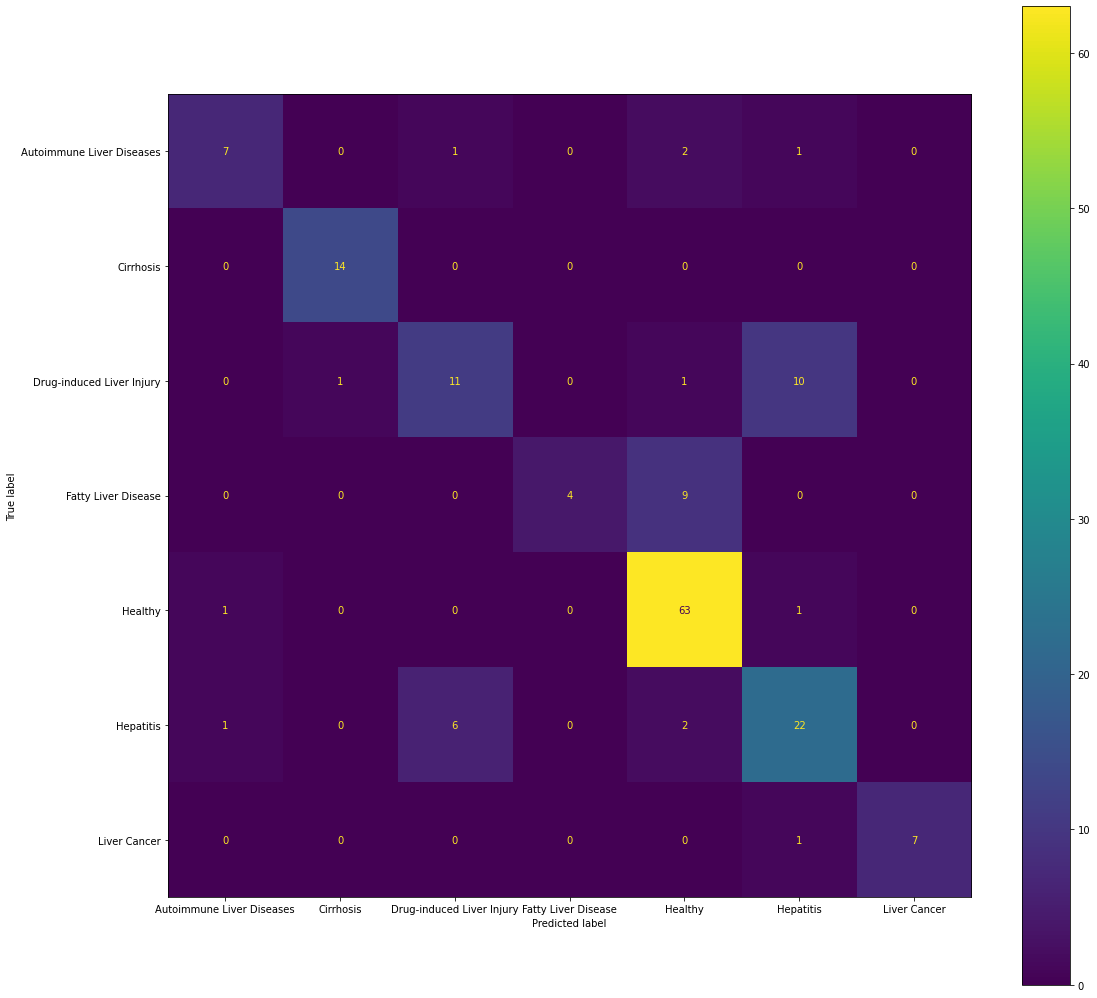

In [29]:
y_pred = log_reg_best.predict(X_val)
fig, ax = plt.subplots(figsize=(18,18))

ConfusionMatrixDisplay.from_predictions(y_val, y_pred, ax=ax)

plt.show()

##### Some comments on the ConfusionMatrix:

1. Autoimmune Liver Disease: 
    * Correctly classified: 7
    * Not correct classified: 4
2. Cirrhosis:
    * Correctly classified: 14
    * Not correct classified: 0
3. Drug-induced Liver Injury:
    * Correctly classified: 11
    * Not correct classified: 12
4. Fatty Liver Disease:
    * Correctly classified: 4
    * Not correct classified: 9
5. Healthy:
    * Correctly classified: 63
    * Not correct classified: 2
6. Hepatitis:
    * Correctly classified: 22
    * Not correct classified: 9
7. Liver Cancer:
    * Correctly classified: 7
    * Not correct classified: 1

### Final evaluation SVC & LogisticRegression

In [30]:
# Training on the whole dataset.
svc_best.fit(X, y)
# Using the realtest set to predict.
y_pred_svc = svc_best.predict(X_test)

In [31]:
# Doing the same using the logistic regression model.
log_reg_best.fit(X, y)
y_pred_lr = log_reg_best.predict(X_test)

### Kaggle submission

In [32]:
# Submission for SVC model.
y_csv_svc = np.savetxt('y_pred_svc.csv', np.dstack((np.arange(0, y_pred_svc.size),y_pred_svc))[0], header="index,Diagnosis", comments='', fmt='%d,%s')

In [33]:
# Submission for Logistic regression model.
y_csv_lr = np.savetxt('y_pred_lr.csv', np.dstack((np.arange(0, y_pred_lr.size),y_pred_lr))[0], header="index,Diagnosis", comments='', fmt='%d,%s')

### Binary version

In [34]:
# Creating a copy of the original target variables
y_binary = y.copy()
y_binary = y_binary.apply(lambda x: 0 if x == 'Healthy' else 1)

In [35]:
y_binary

index
1124    0
1188    1
530     0
686     1
296     0
       ..
693     1
393     0
664     1
767     0
42      1
Name: Diagnosis, Length: 548, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
gs_lr_result = grid_search_lr.fit(X_train, y_train)
print(gs_lr_result.best_score_)
print(gs_lr_result.best_params_)

0.7066424300700918
{'log_reg__C': 0.1, 'log_reg__penalty': 'l2', 'log_reg__solver': 'lbfgs', 'pca__n_components': 0.84}


In [38]:
log_reg_best = gs_lr_result.best_estimator_
log_reg_best.fit(X_train, y_train)
log_reg_best.score(X_test, y_test)

0.7272727272727273

### ROC plots

This code has been take from the lecture notebooks. I tried to implement it on my own but I did not succeed in doing it without looking at the Files/Lecture_16_evaluation_metrics/scripts/ROC_AUC_with_LR.ipynb for help. I have modified a couple of varibles but the rest is the same. I have added extensive comments in order show that I have understood the concepts. The credit of this code goes to Yohann, Timmo and William.

In [39]:
X = X.values
y = y_binary.values

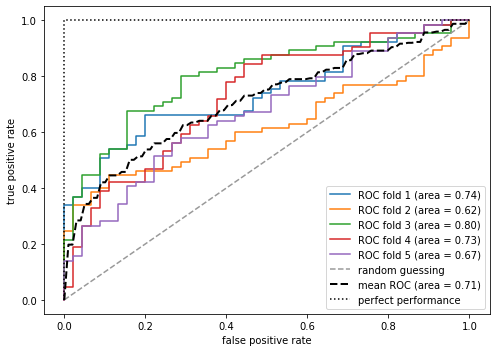

In [40]:
# This code is taken from the lecture notes.

from sklearn.metrics import roc_curve, auc
from numpy import interp
from sklearn.pipeline import make_pipeline


# Set up pipeline with scale, decomposer and classifyer
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2', 
                                           random_state=1, 
                                           C=100.0,
                                           solver='lbfgs'))
# Reduced variable set
X_train2 = X[:, [4, 7, 11]]
    
# Cross-validation specification
# For the different folds there will be some data that will be the test part and 
# the other will be the train part. For each fold, test and train will change, in order 
# to find the best training and testing data to train our model on. In 
# this case we will be using 5 folds, i.e we will have five iterations with different 
# train and test sets.
cv = list(StratifiedKFold(n_splits=5).split(X, y))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

# Loop through folds of CV
# For each fold i, we get the train and test parts out.
for i, (train, test) in enumerate(cv):
    # We train on the training data extracted from our fold
    # and then predict probabilities of the classes using
    # the test data. 
    probas = pipe_lr.fit(X_train2[train],
                         y[train]).predict_proba(X_train2[test]) # Predict probability of classes

    # False Positive and True Positive Rates (thresholds for the decision function)
    fpr, tpr, thresholds = roc_curve(y[test],
                                     probas[:, 1],
                                     pos_label=1)

    # Add to mean True Predictive Rate in a smoothed variant (interpolated)
    # interp will estimate the value between the false positive rate and 
    # the true positive rate for the given mean interval of false positive rate 
    # between 0 and 1 in 100 steps.
    mean_tpr += interp(mean_fpr, fpr, tpr)
    
    # This gives us the area under the curve.
    roc_auc = auc(fpr, tpr)

    # This plots each curve for the different folds i.
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))
    
# This plots the random guessing line.
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

# Average True Positive Rate
mean_tpr /= len(cv)
mean_tpr[0] = 0.0
mean_tpr[-1] = 1.0
# Average AUC
mean_auc = auc(mean_fpr, mean_tpr)

# This plots the mean ROC line. 
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)

# This plots the prefect line.
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')

# Sets limit and titles on the plot.
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

##### Interpretation of the ROC plot

In my plot the mean ROC curve area has a value of 0.71. The curve is not all smooth, but a little jagged or fluctuating in some instances. But the overall smoothness of the curve indicates that it might not be overfitted. 